In [2]:
%load_ext autoreload
%autoreload 2

# import packages
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

In [3]:
%autoreload 2
cell_type_u_s_path="/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv"
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Sntg1,0.045809,0.000000,AAACCTGAGAGGGATA,Pre-endocrine,6.143066,-0.063644
1,Sntg1,0.058600,0.000000,AAACCTGAGCCTTGAT,Ductal,-9.906417,0.197778
2,Sntg1,0.058696,0.000000,AAACCTGAGGCAATTA,Alpha,7.559791,0.583762
3,Sntg1,0.198549,0.000000,AAACCTGCATCATCCC,Ductal,-11.283765,4.218998
4,Sntg1,0.000000,0.000000,AAACCTGGTAAGTGGC,Ngn3 high EP,1.721565,-4.753407
...,...,...,...,...,...,...,...
7391995,Erdr1,0.461130,0.505213,TTTGTCAAGTGACATA,Pre-endocrine,4.768472,-1.388353
7391996,Erdr1,0.643907,0.531752,TTTGTCAAGTGTGGCA,Ngn3 high EP,-1.873335,-4.182650
7391997,Erdr1,0.626258,0.406073,TTTGTCAGTTGTTTGG,Ductal,-9.882250,-0.105594
7391998,Erdr1,0.409493,0.514864,TTTGTCATCGAATGCT,Alpha,6.612424,4.531895


Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-02 22-36-32 as the output path.
Arranging genes for parallel job.
4  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]                                                                                                                                         
                                                                                                                                                                                                           

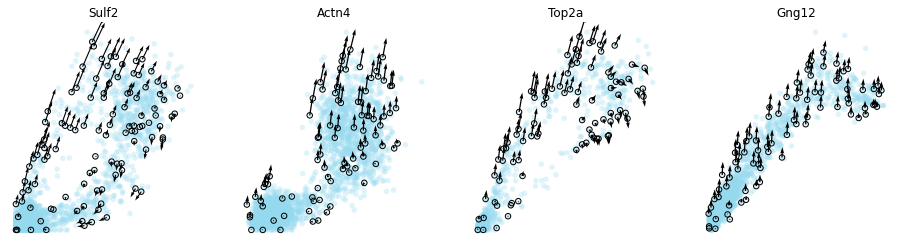

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-02 22-36-33 as the output path.
Arranging genes for parallel job.
4  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]                                                                                                                                         
                                                                                                                                                                                                           

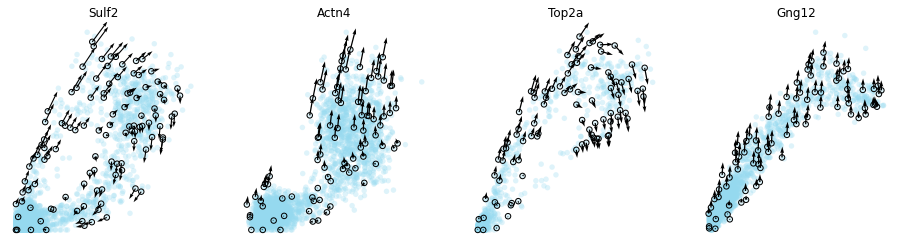

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-02 22-36-34 as the output path.
Arranging genes for parallel job.
4  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]                                                                                                                                         
                                                                                                                                                                                                           

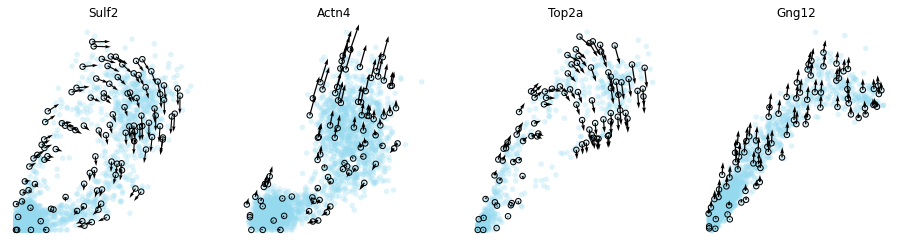

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-02 22-36-36 as the output path.
Arranging genes for parallel job.
4  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]                                                                                                                                         
                                                                                                                                                                                                           

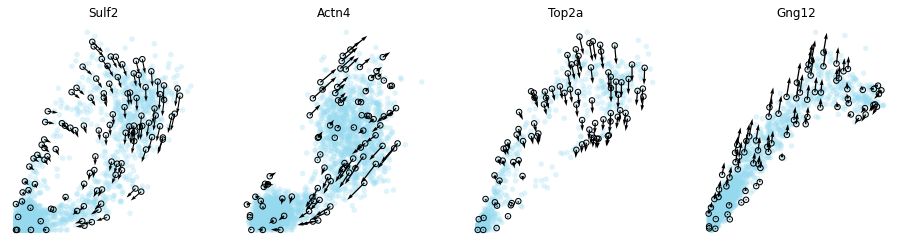

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-02 22-36-39 as the output path.
Arranging genes for parallel job.
4  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]                                                                                                                                         
                                                                                                                                                                                                           

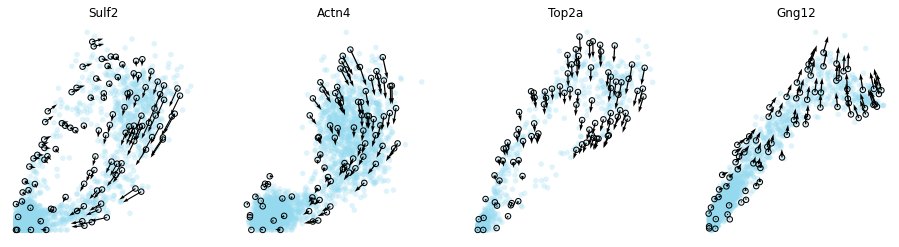

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-02 22-36-45 as the output path.
Arranging genes for parallel job.
4  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]                                                                                                                                         
                                                                                                                                                                                                           

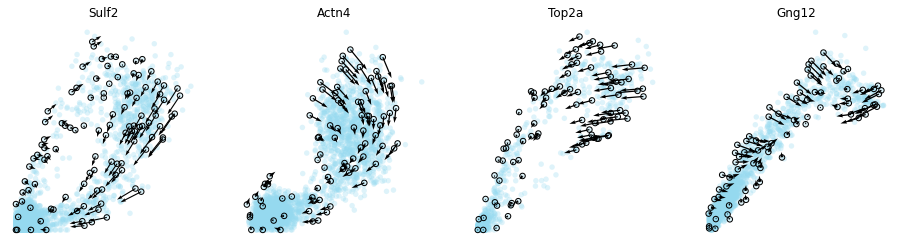

In [27]:
%autoreload 2

gene_list=['Sulf2', 'Actn4', 'Top2a', 'Gng12']
epoch_list=[2,5,10,30,60,80]
for epoch in epoch_list:
    loss_df, cellDancer_df=cd.velocity_estimation.velocity(cell_type_u_s,\
                                                             max_epoches=epoch,\
                                                           patience=10000,\
                                                             check_val_every_n_epoch=1,\
                                                           gene_list=gene_list,\
                                                           permutation_ratio=0.1,\
                                                           norm_u_s=False,\
                                                           norm_cell_distribution=False,
                                                           speed_up=False,
                                                           n_jobs=8)


    ncols=5
    height=math.ceil(len(gene_list)/ncols)*4
    fig = plt.figure(figsize=(20,height))

    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=None,
            colors=None,
            alpha=0.3, 
            s = 30,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('off')

    plt.show()